<a href="https://colab.research.google.com/github/Wudderda/imza_tanima/blob/main/imza_tanima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.24-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('drive/My Drive/')

In [ ]:
!ls -l

total 653527
-rw------- 1 root root  48423515 Oct 13 14:51 '191802092_muhammed_yıldız (1).rar'
-rw------- 1 root root  41313615 Jul 19 21:55 '191802092 Muhammed YILDIZ EE-324 Haberleşme Sistemleri Laboratuvarı-2 Deney Raporları  (1).pdf'
-rw------- 1 root root  41313615 Jul 19 21:50 '191802092 Muhammed YILDIZ EE-324 Haberleşme Sistemleri Laboratuvarı-2 Deney Raporları  (2).pdf'
-rw------- 1 root root  41313615 Jul 20 07:19 '191802092 Muhammed YILDIZ EE-324 Haberleşme Sistemleri Laboratuvarı-2 Deney Raporları .pdf'
-rw------- 1 root root  47413512 Nov 22 13:03  191802092_muhammed_yıldız.rar
drwx------ 2 root root      4096 Jun  8  2020 '191802092 Muhammed YILDIZ - Sayısal Analiz - Final Ödevi exe dosyaları'
-rw------- 1 root root 448448867 Jan 12 20:37 '191802092 Muhammed YILDIZ Sunum Ödevi.mkv'
-rw------- 1 root root       151 Nov  8  2019  2019-2020-guz-yariyili-elektrik-elektronik-muhendisligi-ara-sinav-programi.gsheet
drwx------ 2 root root      4096 Jan  8 15:50  amk
drwx-----

**Checking use whether or not GPU**

In [ ]:
import tensorflow as tf
print(str(tf.test.gpu_device_name()) + "\n")

/device:GPU:0



**Changing directory to Signatures datasets loacation **

In [ ]:
os.chdir('İmza-96/')

In [ ]:
!ls -l

total 782009
-rw------- 1 root root      2500 Nov 26  2018 11-26-2018-SadeceDogruImza-Acc
-rw------- 1 root root  97958392 Nov 26  2018 11-26-2018-SadeceDogruImza-Agirliklar.h5
-rw------- 1 root root      2500 Nov 26  2018 11-26-2018-SadeceDogruImza-Loss
-rw------- 1 root root 109400440 Dec 11  2018 500_model_weights.h5
-rw------- 1 root root      2500 Nov 25  2018 Amodel_100E_class_val_acc
-rw------- 1 root root      2500 Nov 25  2018 Amodel_100E_class_val_loss
-rw------- 1 root root 109123576 Nov 25  2018 Amodel_100E.h5
-rw------- 1 root root      2500 Nov 25  2018 Amodel_100E_model_val_loss
-rw------- 1 root root      2500 Nov 25  2018 Amodel_100E_user_val_acc
-rw------- 1 root root      2500 Nov 25  2018 Amodel_100E_user_val_loss
-rw------- 1 root root   8480768 Nov 25  2018 class_features_train_test.h5
-rw------- 1 root root  27788624 Nov 25  2018 first_model_89-88.h5
-rw------- 1 root root   6312116 Nov 18  2018 Genuine96.npz
-rw------- 1 root root  61567180 Nov 24  2018 Genuine.

**İmporting Libraries**

In [ ]:
import numpy as np
from keras.layers import Conv2D,Input,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,Activation
from keras.models import Model
import keras as K
from keras.optimizers import SGD,Adam

**Preparing to datasets**

In [ ]:
genuine = np.load('Genuine96.npz')
genuine = genuine['arr_0']

In [ ]:
opposite = np.load('OppositeHand96.npz')
opposite = opposite['arr_0']

In [ ]:
simple = np.load('Simple96.npz')
simple = simple['arr_0']

In [ ]:
skilled = np.load('Skilled96.npz')
skilled = skilled['arr_0']

In [ ]:
data = np.concatenate((genuine,opposite,simple,skilled),axis=0)

In [ ]:
data = data.reshape((data.shape[0],96,96,3))


In [ ]:
data.shape

(8280, 96, 96, 3)

In [ ]:
labels_class = np.loadtxt('labels_class.txt',delimiter=',',usecols=0,dtype=int)
labels_names = np.loadtxt('labels_names.txt',delimiter=',',usecols=0,dtype=str)

In [ ]:
labels_class = np.expand_dims(labels_class, axis=1)
labels_names = np.expand_dims(labels_names, axis=1)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels_names = encoder.fit_transform(labels_names)

labels_names = np.expand_dims(labels_names, axis=1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(labels_class.shape)

print(labels_names.shape)

(8280, 1)
(8280, 1)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
labels_bn_names = mlb.fit_transform(labels_names)
print(labels_bn_names.shape)


(8280, 4)


In [ ]:
from keras.utils import to_categorical
labels_class_categorical = to_categorical(labels_class, num_classes = 116)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_names, y_test_names = train_test_split(data,labels_bn_names,test_size=0.2,random_state=42)

In [ ]:
X_train, X_test, y_train_class, y_test_class = train_test_split(data,labels_class_categorical,test_size=0.2,random_state=42)

In [ ]:
# DENEMEYE OZEL
from sklearn.model_selection import train_test_split
yeni_label = np.loadtxt('yeni_label.txt',delimiter=',',usecols=0,dtype=str)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
yeni_label = encoder.fit_transform(yeni_label)
from keras.utils import to_categorical
labels_ = to_categorical(yeni_label)

X_train, X_test, yeni_train, yeni_test = train_test_split(data,labels_,test_size=0.2,random_state=42)

print(yeni_train.shape)

(6624, 460)


In [ ]:
print('Eğitim Seti veri sayısı ve boyutu '+str(X_train.shape))
print('Test Seti veri sayısı ve boyutu '+str(X_test.shape))
print('Eğitim Seti etiket sayısı ve boyutu '+str(y_train_names.shape))
print('Test Seti etiket sayısı ve boyutu '+str(y_test_names.shape))
print('Eğitim Seti 2.etiket sayısı ve boyutu '+str(y_train_class.shape))
print('Test Seti 2.etiket sayısı ve boyutu '+str(y_test_class.shape))

Eğitim Seti veri sayısı ve boyutu (6624, 96, 96, 3)
Test Seti veri sayısı ve boyutu (1656, 96, 96, 3)
Eğitim Seti etiket sayısı ve boyutu (6624, 4)
Test Seti etiket sayısı ve boyutu (1656, 4)
Eğitim Seti 2.etiket sayısı ve boyutu (6624, 116)
Test Seti 2.etiket sayısı ve boyutu (1656, 116)


In [ ]:
y_train_class[6,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# **Creating Model from Scracth**

In [ ]:
def conv_block(input_tensor,
               filters,
               kernel_size,
               padding='same',
               strides=(1,1),
               batch=False,
               batch_mom=0.0,
               initializer='RandomNormal'):
    if batch:
        x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding=padding,
               strides=strides,
               kernel_initializer=initializer)(input_tensor)
        x = BatchNormalization(axis=3,momentum=batch_mom)(x)
        x = Activation('relu')(x)
    else:
        x = Conv2D(filters=filters,
                   kernel_size=kernel_size,
                   padding=padding,
                   strides=strides,
                   kernel_initializer=initializer)(input_tensor)
        x = Activation('relu')(x)
        
    return x
    
def my_model(classes,
             initial='RandomNormal',
             mmt=0.0,
             input_shape=None):
    
    main_input = Input(shape = input_shape, name = 'main_input')
    
    
    x = conv_block(main_input,
                  filters = 16,
                  kernel_size = (9,9),
                  strides = (3,3),
                  padding = 'valid',
                  initializer=initial,
                  batch=True)

    x = MaxPooling2D(pool_size = (2,2),
             strides = (2,2))(x)    
    
    x = conv_block(x,
                   filters = 64,
                  kernel_size = (3,3),
                  strides = (1,1),
                  padding = 'valid',
                  initializer=initial,
                  batch=True)

    x = conv_block(x,
                  filters = 64,
                  kernel_size = (3,3),
                  strides = (1,1),
                  padding = 'valid',
                  initializer=initial,
                  batch=True)

    x = MaxPooling2D(pool_size = (2,2),
             strides = (1,1),padding='same')(x)
    
    x = conv_block(x,
                  filters = 128,
                  kernel_size = (3,3),
                  strides = (1,1),
                  padding = 'same',
                  initializer=initial,
                  batch=True)
    
    x = conv_block(x,
                  filters = 128,
                  kernel_size = (3,3),
                  strides = (1,1),
                  padding = 'same',
                  initializer=initial,
                  batch=True)
    
    flat = Flatten()(x)
    
    model = Dense(256, name = 'Fully_Connected_Layer')(flat)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    
    model = Dropout(0.4)(model)
    
    model = Dense(256, name = 'Fully_Connected_Layer_2')(model)
    model = BatchNormalization()(model)
    model = Activation('relu', name = 'Connection_Layer')(model)
    
    model = Dropout(0.4, name = 'Connection_User')(model)
      
    aux_out = Dense(256, name = 'Fully_Connected_Layer_3-' )(flat)
    aux_out = BatchNormalization()(aux_out)
    aux_out = Activation('relu')(aux_out)
    
    aux_out = Dropout(0.4, name='Connection_Class')(aux_out)
    
    model_user = Dense(classes, activation = 'sigmoid', name = 'userOut')(model)
    
    #model_class = Dense(4, activation = 'sigmoid', name = 'classOut')(aux_out)

    models = Model(inputs = main_input, outputs = model_user)  
    return models

In [ ]:
model = my_model(input_shape=(96,96,3),initial='RandomNormal',classes=460)

batch_size = 32
steps_epoch = len(X_train)
val_steps = len(X_test)

epochs = 100
learning_rate = 10e-2
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=True)

model.compile(optimizer = sgd,
            loss={'userOut':'categorical_crossentropy',
            'classOut': 'binary_crossentropy'},
            metrics = ['accuracy'])

model.compile(optimizer = sgd,
            loss='binary_crossentropy',
            metrics = ['binary_accuracy'])

In [ ]:
model.fit(x = X_train,
          y=yeni_train,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,yeni_test),
          shuffle=True,
          batch_size = batch_size)

Epoch 1/100
207/207 [==============================] - 10s 10ms/step - loss: 0.3738 - binary_accuracy: 0.8406 - val_loss: 0.0798 - val_binary_accuracy: 0.9978
Epoch 2/100
207/207 [==============================] - 2s 8ms/step - loss: 0.0389 - binary_accuracy: 0.9978 - val_loss: 0.0361 - val_binary_accuracy: 0.9978
Epoch 3/100
207/207 [==============================] - 2s 8ms/step - loss: 0.0245 - binary_accuracy: 0.9978 - val_loss: 0.0264 - val_binary_accuracy: 0.9978
Epoch 4/100
207/207 [==============================] - 2s 8ms/step - loss: 0.0205 - binary_accuracy: 0.9978 - val_loss: 0.0224 - val_binary_accuracy: 0.9978
Epoch 5/100
207/207 [==============================] - 2s 8ms/step - loss: 0.0186 - binary_accuracy: 0.9978 - val_loss: 0.0202 - val_binary_accuracy: 0.9978
Epoch 6/100
207/207 [==============================] - 2s 8ms/step - loss: 0.0177 - binary_accuracy: 0.9978 - val_loss: 0.0189 - val_binary_accuracy: 0.9978
Epoch 7/100
207/207 [==============================] - 2

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
np.savetxt('Spyder_model_val_userOut_acc',model.history.history['val_userOut_acc'],delimiter=',')
np.savetxt('Spyder_model_val_classOut_acc',model.history.history['val_classOut_acc'],delimiter=',')

np.savetxt('Spyder_model_val_userOut_loss',model.history.history['val_userOut_loss'],delimiter=',')
np.savetxt('Spyder_model_val_classOut_loss',model.history.history['val_classOut_loss'],delimiter=',')

KeyError: ignored

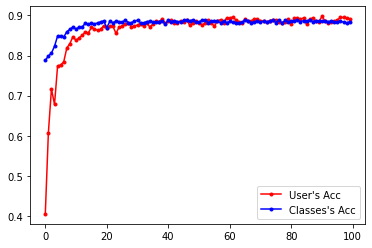

In [ ]:
import matplotlib.pyplot as plt
val_userOut_acc=np.loadtxt('Spyder_model_val_userOut_acc',delimiter=',')
val_classOut_acc=np.loadtxt('Spyder_model_val_classOut_acc',delimiter=',')
plt.plot(val_userOut_acc,'r.-')
plt.plot(val_classOut_acc,'b.-')
plt.legend(['User\'s Acc','Classes\'s Acc'])
plt.show()

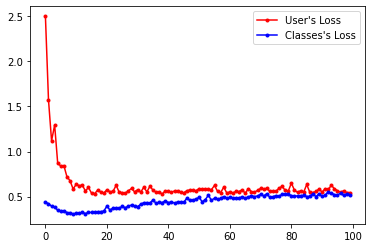

In [ ]:
val_userOut_loss=np.loadtxt('Spyder_model_val_userOut_loss',delimiter=',')
val_classOut_loss=np.loadtxt('Spyder_model_val_classOut_loss',delimiter=',')
plt.plot(val_userOut_loss,'r.-')
plt.plot(val_classOut_loss,'b.-')
plt.legend(['User\'s Loss','Classes\'s Loss'])
plt.show()

# Weight Regularization and more Dropout

In [ ]:
from keras import regularizers

def conv_block(input_tensor,
               filters,
               kernel_size,
               padding='same',
               strides=(1,1),
               batch=False,
               batch_mom=0.0,
               initializer='RandomNormal'):
    if batch:
        x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding=padding,
               strides=strides,
               kernel_initializer=initializer)(input_tensor)
        x = BatchNormalization(axis=3,momentum=batch_mom)(x)
        x = Activation('relu')(x)
    else:
        x = Conv2D(filters=filters,
                   kernel_size=kernel_size,
                   padding=padding,
                   strides=strides,
                   kernel_initializer=initializer)(input_tensor)
        x = Activation('relu')(x)
        
    return x
    
def my_model(initial='RandomNormal',
             mmt=0.0,
             input_shape=None):
    
    main_input = Input(shape = input_shape, name = 'main_input')
    
    
    x = conv_block(main_input,
                  filters = 16,
                  kernel_size = (10,10),
                  strides = (3,3),
                  padding = 'valid',
                  initializer=initial,
                  batch=True)

    x = MaxPooling2D(pool_size = (2,2),
             strides = (2,2))(x)    
    
    x = conv_block(x,
                   filters = 64,
                  kernel_size = (3,3),
                  strides = (1,1),
                  padding = 'valid',
                  initializer=initial,
                  batch=True)

    x = conv_block(x,
                  filters = 64,
                  kernel_size = (3,3),
                  strides = (1,1),
                  padding = 'valid',
                  initializer=initial,
                  batch=True)

    x = MaxPooling2D(pool_size = (2,2),
             strides = (1,1),padding='same')(x)
    
    x = conv_block(x,
                  filters = 128,
                  kernel_size = (3,3),
                  strides = (1,1),
                  padding = 'same',
                  initializer=initial,
                  batch=True)
    
    x = conv_block(x,
                  filters = 128,
                  kernel_size = (3,3),
                  strides = (1,1),
                  padding = 'same',
                  initializer=initial,
                  batch=True)
    
    flat = Flatten()(x)
    
    model = Dense(256, name = 'Fully_Connected_Layer', kernel_regularizer = regularizers.l2(1e-5))(flat)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    
    model = Dropout(0.6)(model)
    
    model = Dense(256, name = 'Fully_Connected_Layer_2', kernel_regularizer = regularizers.l2(1e-5))(model)
    model = BatchNormalization()(model)
    model = Activation('relu', name = 'Connection_Layer')(model)
    
    model = Dropout(0.6)(model)
      
    aux_out = Dense(256, name = 'Fully_Connected_Layer_3-', kernel_regularizer = regularizers.l2(1e-5) )(flat)
    aux_out = BatchNormalization()(aux_out)
    aux_out = Activation('relu')(aux_out)
    
    aux_out = Dropout(0.6)(aux_out)
    
    model_user = Dense(116, activation = 'softmax', name = 'userOut')(model)

    model_class = Dense(4, activation = 'sigmoid', name = 'classOut')(aux_out)

    models = Model(inputs = main_input, outputs = [model_user,model_class])  
    return models

In [ ]:
model_reg = my_model(input_shape=(96,96,3),initial='he_normal')

batch_size = 32
steps_epoch = len(X_train)
val_steps = len(X_test)

epochs = 100
learning_rate = 10e-2
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=True)

model_reg.compile(optimizer = sgd,
            loss={'userOut':'categorical_crossentropy',
            'classOut': 'binary_crossentropy'},
            metrics = ['accuracy'])

In [ ]:
model_reg.fit(x = X_train,
          y={'userOut': y_train_class,
           'classOut': y_train_names},
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,
		      {"userOut": y_test_class, "classOut": y_test_names}),
          shuffle=True,
          batch_size = batch_size)

Epoch 1/100
207/207 [==============================] - 4s 12ms/step - loss: 5.6409 - userOut_loss: 5.0660 - classOut_loss: 0.5535 - userOut_accuracy: 0.0252 - classOut_accuracy: 0.5043 - val_loss: 4.5298 - val_userOut_loss: 4.0274 - val_classOut_loss: 0.4764 - val_userOut_accuracy: 0.0924 - val_classOut_accuracy: 0.5634
Epoch 2/100
207/207 [==============================] - 2s 10ms/step - loss: 4.5470 - userOut_loss: 4.0389 - classOut_loss: 0.4817 - userOut_accuracy: 0.0836 - classOut_accuracy: 0.5318 - val_loss: 3.8330 - val_userOut_loss: 3.3748 - val_classOut_loss: 0.4305 - val_userOut_accuracy: 0.2216 - val_classOut_accuracy: 0.5489
Epoch 3/100
207/207 [==============================] - 2s 11ms/step - loss: 4.0228 - userOut_loss: 3.5437 - classOut_loss: 0.4510 - userOut_accuracy: 0.1631 - classOut_accuracy: 0.5586 - val_loss: 3.0549 - val_userOut_loss: 2.6026 - val_classOut_loss: 0.4228 - val_userOut_accuracy: 0.3671 - val_classOut_accuracy: 0.5713
Epoch 4/100
207/207 [=============

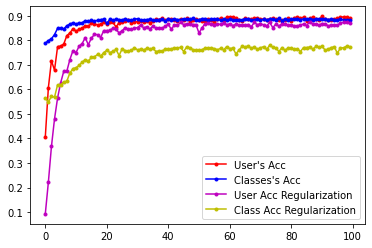

In [ ]:
plt.plot(val_userOut_acc,'r.-')
plt.plot(val_classOut_acc,'b.-')
plt.plot(model_reg.history.history['val_userOut_accuracy'],'m.-')
plt.plot(model_reg.history.history['val_classOut_accuracy'],'y.-')
plt.legend(['User\'s Acc','Classes\'s Acc', 'User Acc Regularization','Class Acc Regularization'])
plt.show()

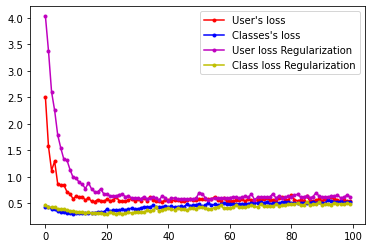

In [ ]:
plt.plot(val_userOut_loss,'r.-')
plt.plot(val_classOut_loss,'b.-')
plt.plot(model_reg.history.history['val_userOut_loss'],'m.-')
plt.plot(model_reg.history.history['val_classOut_loss'],'y.-')
plt.legend(['User\'s loss','Classes\'s loss', 'User loss Regularization','Class loss Regularization'])
plt.show()

In [ ]:
!ls -l

total 782009
-rw------- 1 root root      2500 Nov 26  2018 11-26-2018-SadeceDogruImza-Acc
-rw------- 1 root root  97958392 Nov 26  2018 11-26-2018-SadeceDogruImza-Agirliklar.h5
-rw------- 1 root root      2500 Nov 26  2018 11-26-2018-SadeceDogruImza-Loss
-rw------- 1 root root 109400440 Dec 11  2018 500_model_weights.h5
-rw------- 1 root root      2500 Nov 25  2018 Amodel_100E_class_val_acc
-rw------- 1 root root      2500 Nov 25  2018 Amodel_100E_class_val_loss
-rw------- 1 root root 109123576 Nov 25  2018 Amodel_100E.h5
-rw------- 1 root root      2500 Nov 25  2018 Amodel_100E_model_val_loss
-rw------- 1 root root      2500 Nov 25  2018 Amodel_100E_user_val_acc
-rw------- 1 root root      2500 Nov 25  2018 Amodel_100E_user_val_loss
-rw------- 1 root root   8480768 Nov 25  2018 class_features_train_test.h5
-rw------- 1 root root  27788624 Nov 25  2018 first_model_89-88.h5
-rw------- 1 root root   6312116 Nov 18  2018 Genuine96.npz
-rw------- 1 root root  61567180 Nov 24  2018 Genuine.

# **Using More Data**

In [ ]:
X_train = np.load('X_train.npz')
X_train = X_train['arr_0']

X_test = np.load('X_test.npz')
X_test = X_test['arr_0']

y_train_class = np.load('y_train_class.npz')
y_train_class = y_train_class['arr_0']

y_test_class = np.load('y_test_class.npz')
y_test_class = y_test_class['arr_0']

y_train_names = np.load('y_train_names.npz')
y_train_names = y_train_names['arr_0']

y_test_names = np.load('y_test_names.npz')
y_test_names = y_test_names['arr_0']

In [ ]:
X_train = X_train.reshape((X_train.shape[0],96,96,3))
X_test = X_test.reshape((X_test.shape[0],96,96,3))

In [ ]:
model_more_data = my_model(input_shape=(96,96,3),initial='he_normal')

batch_size = 32
steps_epoch = len(X_train)
val_steps = len(X_test)

epochs = 100
learning_rate = 10e-2
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=True)

model_more_data.compile(optimizer = sgd,
            loss={'userOut':'categorical_crossentropy',
            'classOut': 'binary_crossentropy'},
            metrics = ['accuracy'])

In [ ]:
model_more_data.fit(x = X_train,
          y={'userOut': y_train_class,
           'classOut': y_train_names},
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,
		      {"userOut": y_test_class, "classOut": y_test_names}),
          shuffle=True,
          batch_size = batch_size)

Epoch 1/100
311/311 [==============================] - 6s 14ms/step - loss: 5.6510 - userOut_loss: 5.0310 - classOut_loss: 0.5968 - userOut_accuracy: 0.0268 - classOut_accuracy: 0.4583 - val_loss: 4.5988 - val_userOut_loss: 4.0959 - val_classOut_loss: 0.4751 - val_userOut_accuracy: 0.0769 - val_classOut_accuracy: 0.5157
Epoch 2/100
311/311 [==============================] - 4s 12ms/step - loss: 4.3211 - userOut_loss: 3.8056 - classOut_loss: 0.4871 - userOut_accuracy: 0.1146 - classOut_accuracy: 0.5214 - val_loss: 3.4640 - val_userOut_loss: 2.9820 - val_classOut_loss: 0.4519 - val_userOut_accuracy: 0.2866 - val_classOut_accuracy: 0.5604
Epoch 3/100
311/311 [==============================] - 4s 12ms/step - loss: 3.7816 - userOut_loss: 3.2850 - classOut_loss: 0.4659 - userOut_accuracy: 0.1857 - classOut_accuracy: 0.5370 - val_loss: 2.9253 - val_userOut_loss: 2.4480 - val_classOut_loss: 0.4453 - val_userOut_accuracy: 0.4050 - val_classOut_accuracy: 0.5596
Epoch 4/100
311/311 [=============

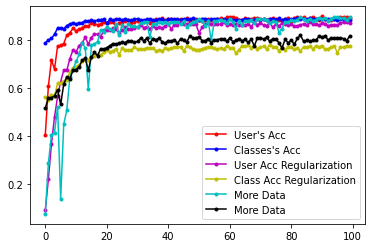

In [ ]:
plt.plot(val_userOut_acc,'r.-')
plt.plot(val_classOut_acc,'b.-')
plt.plot(model_reg.history.history['val_userOut_accuracy'],'m.-')
plt.plot(model_reg.history.history['val_classOut_accuracy'],'y.-')
plt.plot(model_more_data.history.history['val_userOut_accuracy'],'c.-')
plt.plot(model_more_data.history.history['val_classOut_accuracy'],'k.-')
plt.legend(['User\'s Acc','Classes\'s Acc', 'User Acc Regularization','Class Acc Regularization','More Data','More Data'])
plt.show()

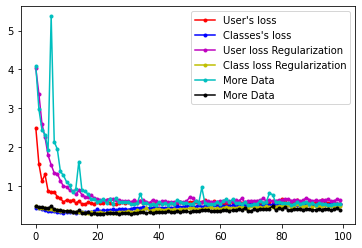

In [ ]:
plt.plot(val_userOut_loss,'r.-')
plt.plot(val_classOut_loss,'b.-')
plt.plot(model_reg.history.history['val_userOut_loss'],'m.-')
plt.plot(model_reg.history.history['val_classOut_loss'],'y.-')
plt.plot(model_more_data.history.history['val_userOut_loss'],'c.-')
plt.plot(model_more_data.history.history['val_classOut_loss'],'k.-')
plt.legend(['User\'s loss','Classes\'s loss', 'User loss Regularization','Class loss Regularization','More Data', 'More Data'])
plt.show()

# **With SVM**

Saving first model weights

**User Features**

In [ ]:
model.save_weights('first_model_89-88.h5')

In [ ]:
print(tf.__version__)
print(K.__version__)

2.4.0
2.4.3


In [ ]:
model_temp = my_model(input_shape=(96,96,3))
model_temp.load_weights('first_model_89-88.h5')
model_temp.layers.pop()

for layers in model_temp.layers:
    layers.trainable=False
    print(layers, layers.trainable)
    
layer_name = 'Connection_User'
FC_layer_out = Model(inputs=model_temp.input, outputs=model_temp.get_layer(layer_name).output)    
        
training_features = []
test_features = []

for i in range(X_train.shape[0]):
    temp_img = X_train[i]
    temp_img = np.expand_dims(temp_img,axis=0)
    features = FC_layer_out.predict(temp_img)
    training_features.append(features)
    
training_features = np.array(training_features)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb4dbe2e048> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb4dbe2e470> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb4dbe41b38> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fb4dbea01d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb4dbe41400> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb4dbe2e438> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb4dbf26240> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fb4dbe8dd68> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb4dbea7710> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb4dbe6c0f0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fb4dbe6c9b0> False
<tensorflow.python.keras.layers.p

ValueError: ignored

In [ ]:
for i in range(X_test.shape[0]):
    temp_im = X_test[i]
    temp_im = np.expand_dims(temp_im,axis=0)
    features_test = FC_layer_out.predict(temp_im)
    test_features.append(features_test)
    
test_features = np.array(test_features)

NameError: ignored

In [ ]:
import h5py as h5

In [ ]:
features = h5.File('user_features_train_test.h5','w')
features.create_dataset('train', data = training_features)
features.create_dataset('test', data = test_features)
features.close()

**Class Features**

In [ ]:
model_temp = my_model(input_shape=(96,96,3))
model_temp.load_weights('first_model_89-88.h5')
model_temp.layers.pop()

for layers in model_temp.layers:
    layers.trainable=False
    print(layers, layers.trainable)
    
layer_name = 'Connection_Class'
FC_layer_out = Model(inputs=model_temp.input, outputs=model_temp.get_layer(layer_name).output)    
        
training_features = []
test_features = []

for i in range(X_train.shape[0]):
    temp_img = X_train[i]
    temp_img = np.expand_dims(temp_img,axis=0)
    features = FC_layer_out.predict(temp_img)
    training_features.append(features)
    
training_features = np.array(training_features)

<keras.engine.input_layer.InputLayer object at 0x7fa213af0ba8> False
<keras.layers.convolutional.Conv2D object at 0x7fa2166cd7f0> False
<keras.layers.normalization.BatchNormalization object at 0x7fa213af0eb8> False
<keras.layers.core.Activation object at 0x7fa213af07f0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa21770ec18> False
<keras.layers.convolutional.Conv2D object at 0x7fa217730b70> False
<keras.layers.normalization.BatchNormalization object at 0x7fa213a8dcc0> False
<keras.layers.core.Activation object at 0x7fa213a3b4e0> False
<keras.layers.convolutional.Conv2D object at 0x7fa2139e67f0> False
<keras.layers.normalization.BatchNormalization object at 0x7fa2139fd208> False
<keras.layers.core.Activation object at 0x7fa2139ba320> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa213936c88> False
<keras.layers.convolutional.Conv2D object at 0x7fa2138d30b8> False
<keras.layers.normalization.BatchNormalization object at 0x7fa2138c6fd0> False
<keras.layers.core.Activati

In [ ]:
for i in range(X_test.shape[0]):
    temp_im = X_test[i]
    temp_im = np.expand_dims(temp_im,axis=0)
    features_test = FC_layer_out.predict(temp_im)
    test_features.append(features_test)
    
test_features = np.array(test_features)

In [ ]:
features = h5.File('class_features_train_test.h5','w')
features.create_dataset('train', data = training_features)
features.create_dataset('test', data = test_features)
features.close()

**Loading Data, if the upside lines was already runned, run it these only.**

In [ ]:
import h5py as h5
hf = h5.File('user_features_train_test.h5','r')
hf.keys()

train_data_user = hf.get('train')
test_data_user = hf.get('test')

train_data_user = np.asarray(train_data_user)
print(train_data_user.shape)

test_data_user = np.asarray(test_data_user)
print(test_data_user.shape)

hf.close()

train_data_user = np.reshape(train_data_user,(train_data_user.shape[0],train_data_user.shape[2]))
test_data_user = np.reshape(test_data_user,(test_data_user.shape[0],test_data_user.shape[2]))
print(train_data_user.shape)
print(test_data_user.shape)

(6624, 1, 256)
(1656, 1, 256)
(6624, 256)
(1656, 256)


In [ ]:
hf = h5.File('class_features_train_test.h5','r')
hf.keys()

train_data_class = hf.get('train')
test_data_class = hf.get('test')

train_data_class = np.asarray(train_data_class)
print(train_data_class.shape)

test_data_class = np.asarray(test_data_class)
print(test_data_class.shape)

hf.close()

train_data_class = np.reshape(train_data_class,(train_data_class.shape[0],train_data_class.shape[2]))
test_data_class = np.reshape(test_data_class,(test_data_class.shape[0],test_data_class.shape[2]))
print(train_data_class.shape)
print(test_data_class.shape)

(6624, 1, 256)
(1656, 1, 256)
(6624, 256)
(1656, 256)


In [ ]:
#y_train_class = user to_categorical, y_train_names = class mlb

train_data_user_label = y_train_class
test_data_user_label = y_test_class

train_data_class_label = y_train_names
test_data_class_label = y_test_names

In [ ]:
train_data_class_label = mlb.inverse_transform(train_data_class_label)
test_data_class_label = mlb.inverse_transform(test_data_class_label)

train_data_user_label = np.argmax(train_data_user_label ,axis=1)
test_data_user_label = np.argmax(test_data_user_label ,axis=1)

In [ ]:
class_label = []
for item in range(len(train_data_class_label)):
  temp = train_data_class_label[item]
  temp = temp[0]
  class_label.append(temp)
  

In [ ]:
class_label_test = []
for item in range(len(test_data_class_label)):
  temp = test_data_class_label[item]
  temp = temp[0]
  class_label_test.append(temp)

In [ ]:
class_label = np.array(class_label)
class_label_test = np.array(class_label_test)
print(class_label.shape)
print(class_label_test.shape)
print(len(train_data_class_label))
print(len(test_data_class_label))

(6624,)
(1656,)
6624
1656


In [ ]:
train_data_user_label.shape

(6624,)

In [ ]:
class_label.shape

(6624,)

In [ ]:
!pip install scikit-multilearn

    100% |████████████████████████████████| 71kB 6.0MB/s 


In [ ]:
yeni_train.shape

(6624,)

In [ ]:

from sklearn.svm import SVC

clf = SVC(kernel='rbf',random_state=42, degree=3)
clf.fit(train_data_user, yeni_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
prediction = clf.predict(test_data_user)

In [ ]:
import sklearn.metrics as metrics

metrics.hamming_loss(yeni_test, prediction)

0.45652173913043476

In [ ]:
metrics.accuracy_score(yeni_test, prediction)


0.5434782608695652

**Using Class Features**

In [ ]:
clf.fit(train_data_class, class_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
prediction_class = clf.predict(test_data_class)

In [ ]:
metrics.hamming_loss(class_label_test, prediction_class)

0.23067632850241546

In [ ]:
metrics.accuracy_score(class_label_test, prediction_class)

0.7693236714975845

# Using RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1, random_state=42, criterion='entropy',n_estimators=30)

clf.fit(train_data_user, yeni_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
prediction = clf.predict(test_data_user)

In [ ]:
from sklearn import metrics
metrics.hamming_loss(yeni_test, prediction)

0.3858695652173913

In [ ]:
metrics.accuracy_score(yeni_test, prediction)

0.6141304347826086

In [ ]:
'''from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = train_data_user, y = train_data_user_label, cv = 5)
accuracies.mean()
accuracies.std()'''

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = clf,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search = grid_search.fit(train_data_user, yeni_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
